In [540]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import glob

In [5]:
glob.glob("data/0*.csv")

['data\\00001.csv',
 'data\\00002.csv',
 'data\\00003.csv',
 'data\\00004.csv',
 'data\\00005.csv',
 'data\\00006.csv',
 'data\\00007.csv',
 'data\\00008.csv',
 'data\\00009.csv',
 'data\\00010.csv',
 'data\\00011.csv',
 'data\\00012.csv',
 'data\\00013.csv',
 'data\\00014.csv',
 'data\\00015.csv',
 'data\\00016.csv',
 'data\\00017.csv',
 'data\\00018.csv',
 'data\\00019.csv',
 'data\\00020.csv',
 'data\\00021.csv',
 'data\\00022.csv',
 'data\\00023.csv',
 'data\\00024.csv',
 'data\\00025.csv',
 'data\\00026.csv',
 'data\\00027.csv',
 'data\\00028.csv',
 'data\\00029.csv',
 'data\\00030.csv',
 'data\\00031.csv',
 'data\\00032.csv',
 'data\\00033.csv',
 'data\\00034.csv',
 'data\\00035.csv',
 'data\\00036.csv',
 'data\\00037.csv',
 'data\\00038.csv',
 'data\\00039.csv',
 'data\\00040.csv',
 'data\\00041.csv',
 'data\\00042.csv',
 'data\\00043.csv',
 'data\\00044.csv',
 'data\\00045.csv',
 'data\\00046.csv',
 'data\\00047.csv',
 'data\\00048.csv',
 'data\\00049.csv',
 'data\\00050.csv',


In [7]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.sample(10)

type                                         start_time  \
2992  impedance  [2009.      4.     17.     22.     17.     27.25]   
3010  discharge  [2010.      6.     17.      8.     10.     30.89]   
810   discharge  [2010.       6.       9.       7.       7.    ...   
4249     charge  [2009.       4.      17.      16.      14.    ...   
6577     charge  [2008.       8.       9.       0.      43.    ...   
3846  impedance  [2009.      8.      5.     15.     21.     17.89]   
2882  discharge  [2009.       8.      24.       7.      35.    ...   
2111     charge  [2.0090e+03 8.0000e+00 2.0000e+00 1.5000e+01 7...   
336   discharge  [2010.       8.      12.      12.      34.    ...   
4176  discharge  [2009.       4.       9.      16.      42.    ...   

      ambient_temperature battery_id  test_id   uid   filename  \
2992                   43      B0030       94  2993  02993.csv   
3010                    4      B0041       15  3011  03011.csv   
810                    22      B0043       74   811  00811.csv   
4249                   43      B0031       90  4250  04250.csv   
6577                   24      B0018      225  6578  06578.csv   
3846                   24      B0036      333  3847  03847.csv   
2882                   24      B0033      470  2883  02883.csv   
2111                   24      B0034      307  2112  02112.csv   
336                     4      B0045      152   337  00337.csv   
4176                   43      B0031       17  4177  04177.csv   

                 Capacity                   Re                  Rct  
2992                  NaN  0.06397958491992761  0.07510899212924504  
3010  0.05677191308141789                  NaN                  NaN  
810    1.5309356452520158                  NaN                  NaN  
4249                  NaN                  NaN                  NaN  
6577                  NaN                  NaN                  NaN  
3846                  NaN  0.10467308759463242  0.12424657706777059  
2882   1.3046615372928705                  NaN                  NaN  
2111                  NaN                  NaN                  NaN  
336    0.6156760019587869                  NaN                  NaN  
4176   1.8013261041198854                  NaN                  NaN

In [9]:
imp_files_df = metadata_df[metadata_df['type'] == 'impedance'][['start_time','filename','battery_id']]
ch_files_df = metadata_df[metadata_df['type'] == 'charge'][['start_time','filename','battery_id']]
dch_files_df = metadata_df[metadata_df['type'] == 'discharge'][['start_time','filename','battery_id']]

In [11]:
dch_files_df.head(10)

start_time   filename battery_id
0   [2010.       7.      21.      15.       0.    ...  00001.csv      B0047
4   [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...  00005.csv      B0047
6   [2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...  00007.csv      B0047
8   [2010.       7.      22.       6.      16.    ...  00009.csv      B0047
10  [2010.       7.      22.      10.      51.    ...  00011.csv      B0047
12  [2010.       7.      22.      15.      26.    ...  00013.csv      B0047
16  [2010.       7.      23.       9.      59.    ...  00017.csv      B0047
20  [2010.       7.      23.      15.      44.    ...  00021.csv      B0047
22  [2010.       7.      23.      20.      19.    ...  00023.csv      B0047
24  [2010.       7.      24.       0.      52.    ...  00025.csv      B0047

In [13]:
impedance_df = metadata_df[metadata_df['type']=='impedance'][['start_time', 'Re', 'Rct', 'battery_id']]
charge_df = metadata_df[metadata_df['type']=='charge'][['start_time', 'battery_id']]
discharge_df = metadata_df[metadata_df['type']=='discharge'][['start_time', 'Capacity', 'battery_id']]

In [15]:
impedance_df['start_time'].unique()

array(['[2010.       7.      21.      16.      53.      45.968]',
       '[2010    7   21   20   31    5]',
       '[2010.       7.      22.      17.       3.       7.062]',
       '[2010.     7.    22.    20.    40.    25.5]',
       '[2010.       7.      23.      11.      35.      36.875]',
       '[2010.       7.      23.      15.      12.      59.218]',
       '[2010.       7.      24.      11.      30.      35.656]',
       '[2010.       7.      24.      15.       7.      54.015]',
       '[2010.     7.    27.    17.    47.    10.5]',
       '[2010.       7.      27.      21.      24.      31.406]',
       '[2.01e+03 7.00e+00 2.80e+01 1.70e+01 3.60e+01 7.34e-01]',
       '[2010.       7.      28.      21.      13.      22.187]',
       '[2010.      7.     29.     16.     27.     30.14]',
       '[2010.       7.      29.      20.       4.      55.562]',
       '[2010.       7.      30.      15.      48.      12.125]',
       '[2010.       7.      30.      19.      25.      34.984]'

In [17]:
from datetime import datetime
def convert_time(time):
    try:
        if isinstance(time, str):
            time = time.strip('[]').replace(',' , '')
            cont = [float(x) for x in time.split()]
            if len(cont) == 6:
                year, month, day, hour, minute = map(int, cont[:5])
                second = int(cont[5])
                return datetime(year, month, day, hour, minute, second)
            elif isinstance(time, (list,np.ndarray)) and len(time)== 6:
                year, month, day, hour, minute = map(int, time[:5])
                second = int(float(time[5]))
                return datetime(year, month, day, hour, minute, second)
    except (ValueError, SyntaxError, TypeError) as e:
        print("Failed to convert : {value}, Error: {e}")
        return pd.NaT

In [19]:
impedance_df['start_time'] = impedance_df['start_time'].apply(convert_time)
impedance_df = impedance_df.dropna(subset='start_time')
charge_df['start_time'] = charge_df['start_time'].apply(convert_time)
charge_df = charge_df.dropna(subset='start_time')
discharge_df['start_time'] = discharge_df['start_time'].apply(convert_time)
discharge_df = discharge_df.dropna(subset='start_time')
discharge_df.head()

start_time            Capacity battery_id
0  2010-07-21 15:00:35  1.6743047446975208      B0047
4  2010-07-21 21:02:56  1.5243662105099023      B0047
6  2010-07-22 01:40:06  1.5080762969973425      B0047
8  2010-07-22 06:16:21  1.4835577960067696      B0047
10 2010-07-22 10:51:48  1.4671391666146525      B0047

In [21]:
imp_files_df['start_time'] = imp_files_df['start_time'].apply(convert_time)
ch_files_df['start_time'] = ch_files_df['start_time'].apply(convert_time)
dch_files_df['start_time'] = dch_files_df['start_time'].apply(convert_time)
dch_files_df.head()

start_time   filename battery_id
0  2010-07-21 15:00:35  00001.csv      B0047
4  2010-07-21 21:02:56  00005.csv      B0047
6  2010-07-22 01:40:06  00007.csv      B0047
8  2010-07-22 06:16:21  00009.csv      B0047
10 2010-07-22 10:51:48  00011.csv      B0047

In [23]:
impedance_df = impedance_df.sort_values(by='start_time')
imp_files_df = imp_files_df.sort_values(by='start_time')
imp_files_df = imp_files_df.sort_values(by='battery_id')
charge_df = charge_df.sort_values(by='start_time')
ch_files_df = ch_files_df.sort_values(by='start_time')
ch_files_df = ch_files_df.sort_values(by='battery_id')
discharge_df = discharge_df.sort_values(by='start_time')
dch_files_df = dch_files_df.sort_values(by='start_time')
dch_files_df = dch_files_df.sort_values(by='battery_id')
dch_files_df.head()

start_time   filename battery_id
5576 2008-05-18 03:05:19  05577.csv      B0005
5479 2008-05-12 02:36:58  05480.csv      B0005
5233 2008-04-24 01:51:33  05234.csv      B0005
5237 2008-04-24 06:50:00  05238.csv      B0005
5687 2008-05-24 20:21:13  05688.csv      B0005

In [25]:
imp_files_df.head()

start_time   filename battery_id
5160 2008-04-18 20:55:29  05161.csv      B0005
5495 2008-05-13 05:26:51  05496.csv      B0005
5591 2008-05-18 21:59:40  05592.csv      B0005
5300 2008-05-01 02:43:42  05301.csv      B0005
5593 2008-05-18 23:21:28  05594.csv      B0005

In [27]:
bat_data = {}
for index, row in imp_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']

    file_path = f"data/{file}"
    try:
        data = pd.read_csv(file_path)
        if 'Battery_impedance' in data.columns:
            real_imp = data['Battery_impedance'].apply(lambda x: complex(x).real)
            real_imp_value = real_imp.tolist()
            imag_imp = data['Battery_impedance'].apply(lambda x: complex(x).imag)
            imag_imp_value = imag_imp.tolist()
            if bat_id not in bat_data:
                bat_data[bat_id] = {'start_time' : [], 'real_impedance' : [], 'imag_impedance': []}

            bat_data[bat_id]['start_time'].append(start_time)
            bat_data[bat_id]['real_impedance'].append(real_imp_value)
            bat_data[bat_id]['imag_impedance'].append(imag_imp_value)
        else:
            print(f"'Battery_impedance' column not found")
    except Exception as e:
        print(f"Error processing file {file} : {e}")

In [29]:
bat_data['B0005']['real_impedance']

[[-0.43892624830326377,
  0.13008840651776496,
  0.058770560504133235,
  0.0058135116366746726,
  0.12608106668700975,
  0.2210551920556118,
  0.24487368984957383,
  0.23511369186962613,
  0.2237034830463142,
  0.22135400804728403,
  0.22588618131676197,
  0.23080785398562903,
  0.23048306934158666,
  0.22243363411318076,
  0.20746618828670563,
  0.18846706014956466,
  0.16886029616618473,
  0.151483626952876,
  0.13813663408098975,
  0.12964609138324965,
  0.126148349227185,
  0.12735138847177466,
  0.1326751453222899,
  0.1412843498723241,
  0.1520903702331764,
  0.1638060775994828,
  0.175099804688262,
  0.18483000323543242,
  0.19228232063123876,
  0.19730834000585465,
  0.2002945062951636,
  0.20195543444054975,
  0.2030136897788318,
  0.20386977783240773,
  0.20437447292154437,
  0.20379869137317705,
  0.20105705974120325,
  0.19516984464478415,
  0.1858407675559442,
  0.1739287942388404,
  0.16160027379218425,
  0.1521472915681034,
  0.14978162911218032,
  0.15986915567720617,
 

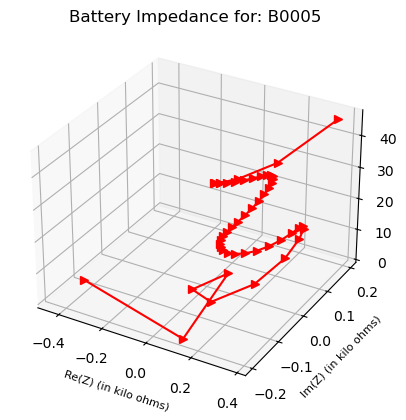

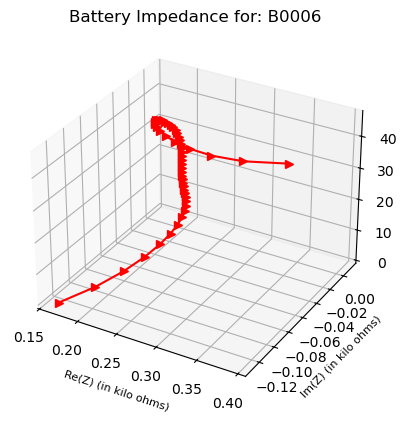

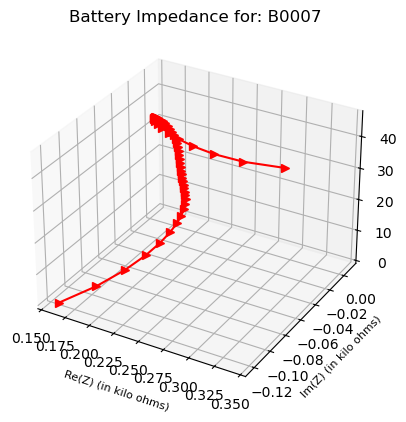

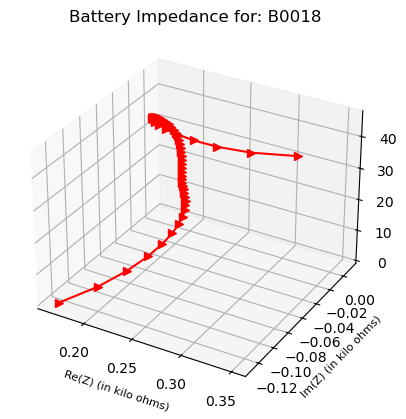

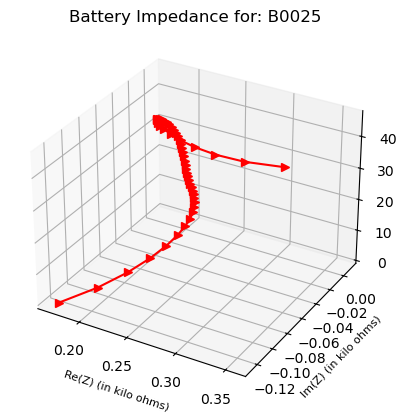

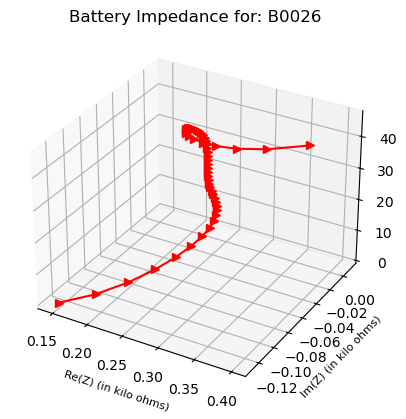

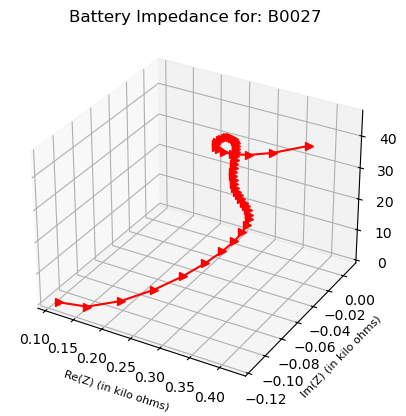

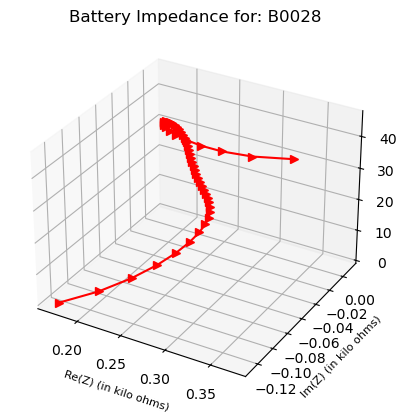

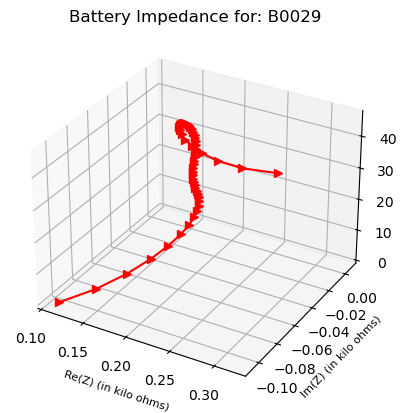

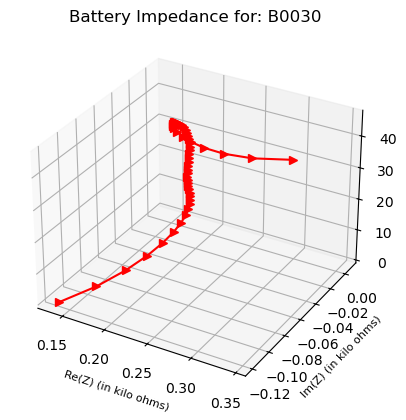

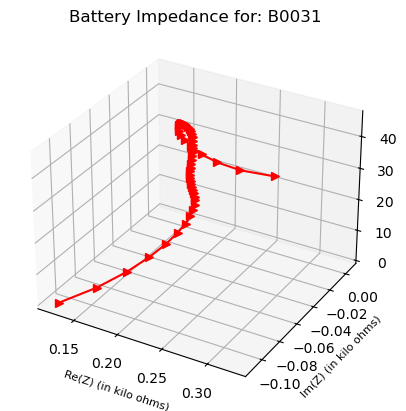

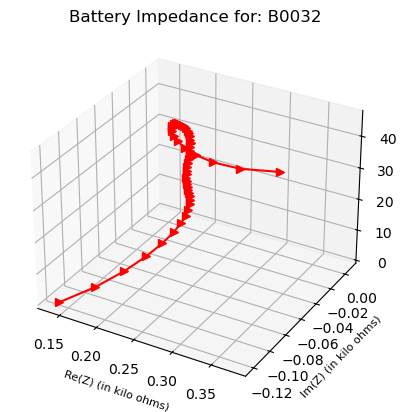

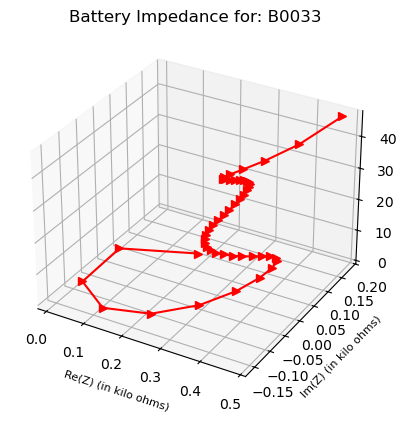

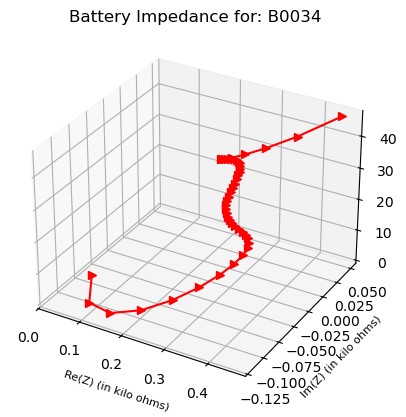

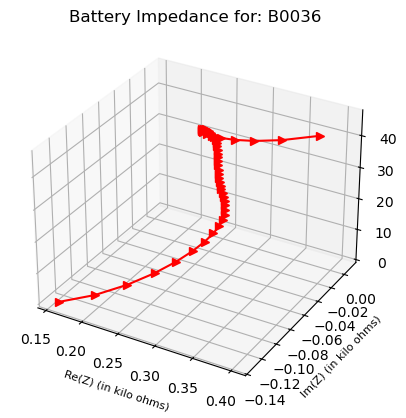

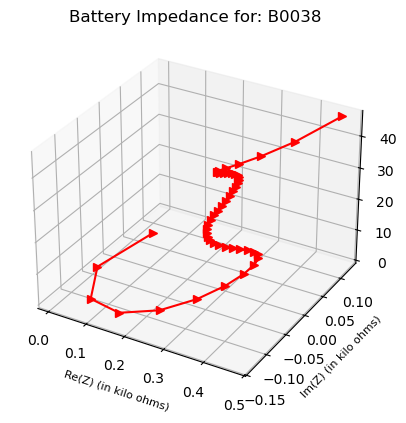

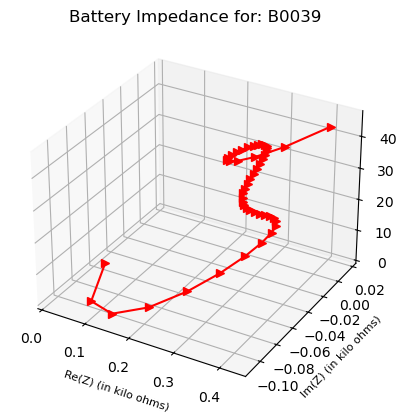

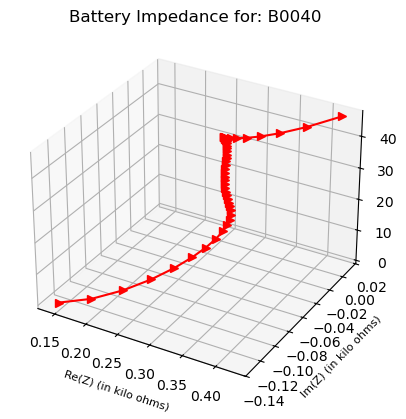

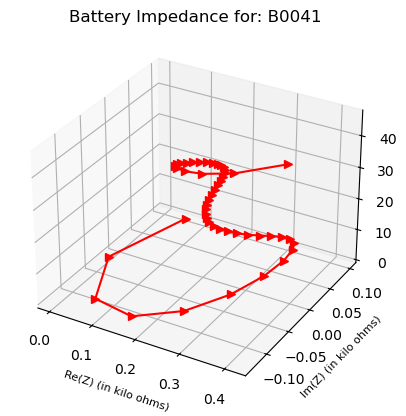

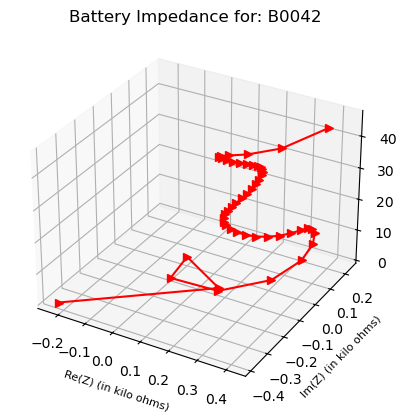

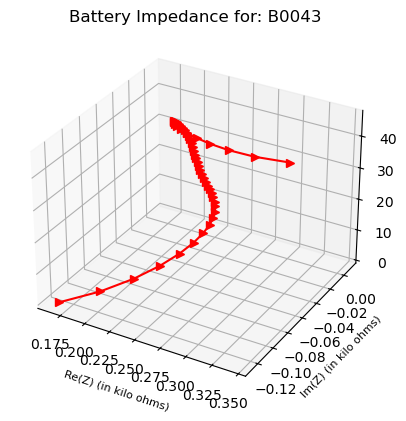

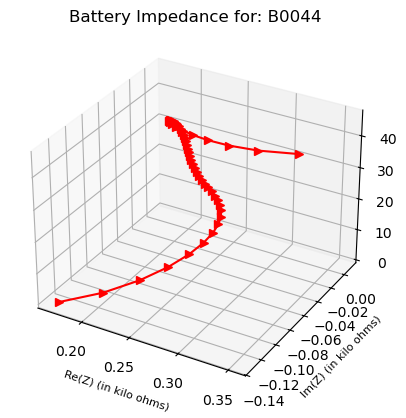

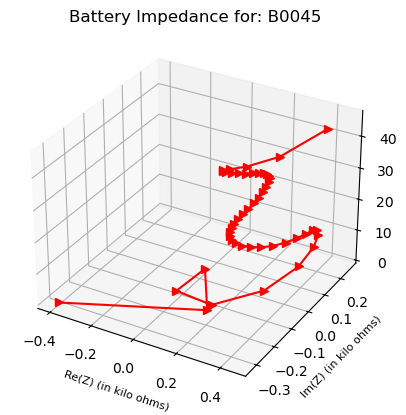

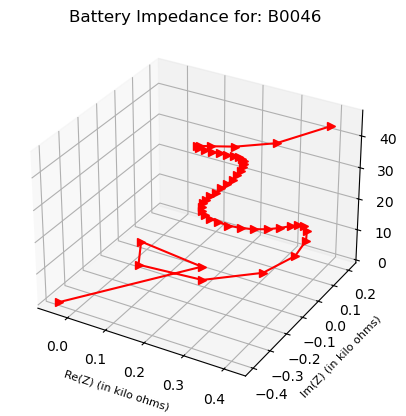

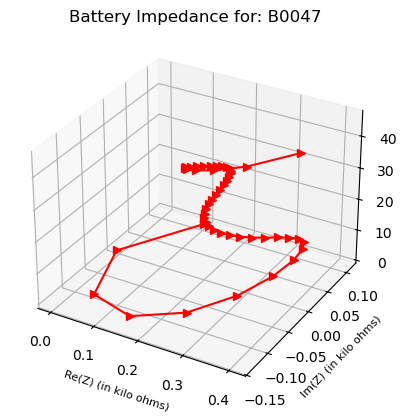

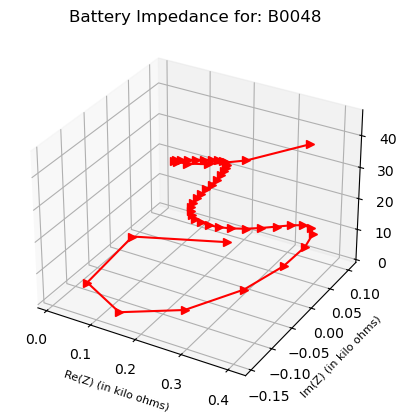

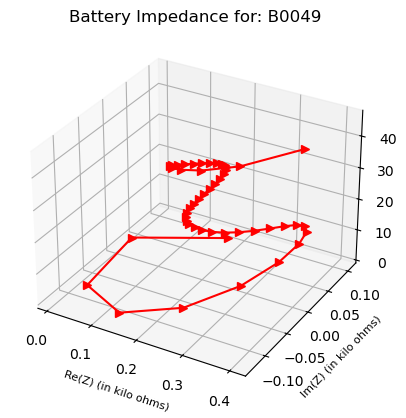

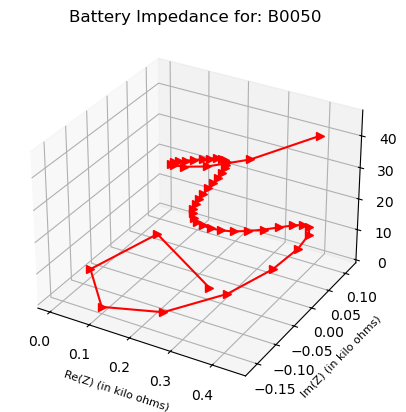

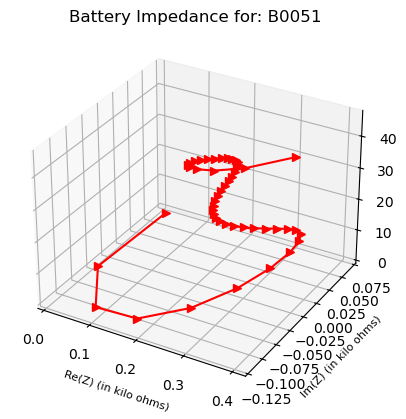

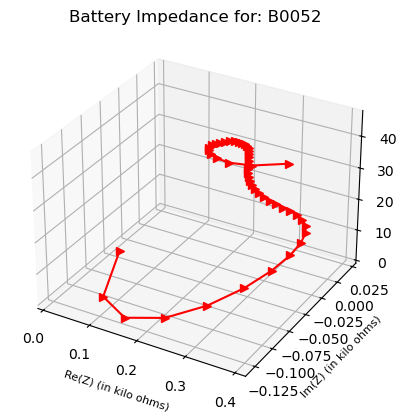

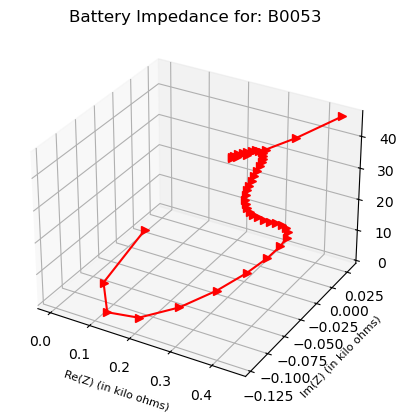

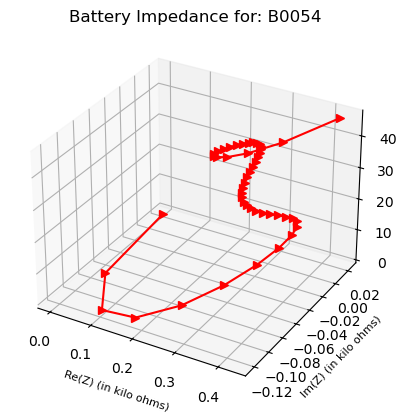

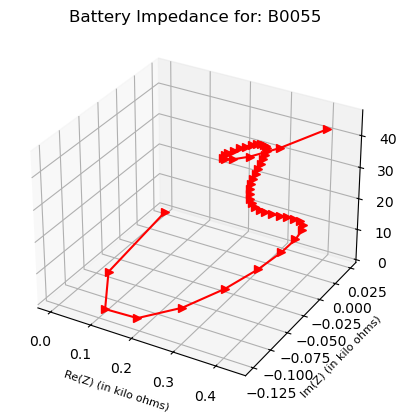

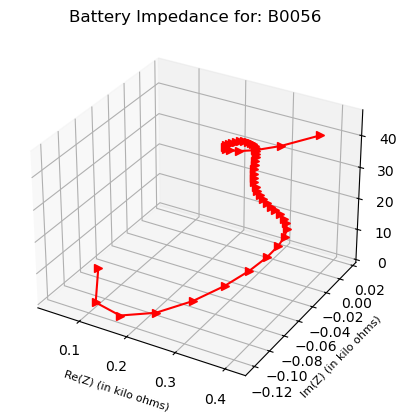

In [31]:
for bat_id, data in bat_data.items():
    ax = plt.axes(projection = '3d')
    x= data['real_impedance'][0]
    y= data['imag_impedance'][0]
    z = []
    for i in range(48):
        z.append(i)
    plt.xlabel('Re(Z) (in kilo ohms)', fontsize = 8)
    plt.ylabel('Im(Z) (in kilo ohms)', fontsize = 8)
    plt.title(f'Battery Impedance for: {bat_id}')
    ax.plot(x, y, z, color = 'red', marker= '>')
    #ax.scatter(x, y, z)
    plt.show()

In [16]:
#######################################

In [33]:
ch_bat_data = {}
for index, row in ch_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']
    file_path = f"data/{file}"
    data = pd.read_csv(file_path)
    voltage = data['Voltage_measured'].tolist()
    cur_char = data['Current_charge'].tolist()
    vol_char = data['Voltage_charge'].tolist()
    
    ch_bat_data[bat_id] = {'start_time' : [], 'Voltage': [], 'Current_charge' : [], 'Voltage_charge': []}

    ch_bat_data[bat_id]['start_time'].append(start_time)
    ch_bat_data[bat_id]['Voltage'].append(voltage)
    ch_bat_data[bat_id]['Current_charge'].append(cur_char)
    ch_bat_data[bat_id]['Voltage_charge'].append(vol_char)

In [18]:
ch_bat_data['B0005']['Voltage']

[0      3.381025
 1      3.082964
 2      3.480391
 3      3.499241
 4      3.512205
          ...   
 946    4.189144
 947    4.189193
 948    4.189269
 949    4.189162
 950    4.189214
 Name: Voltage_measured, Length: 951, dtype: float64]

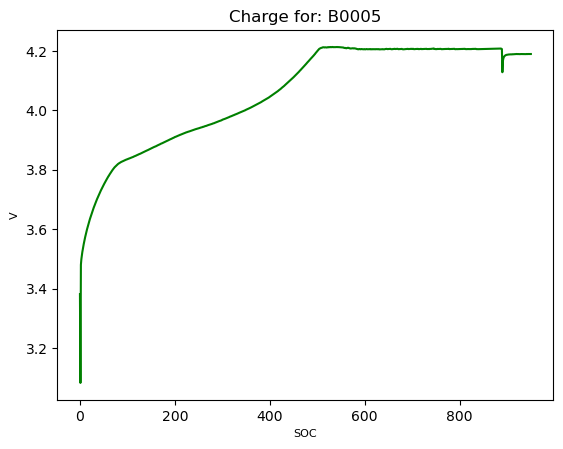

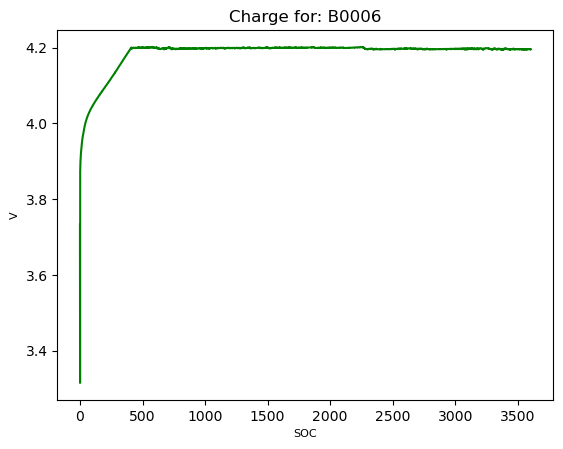

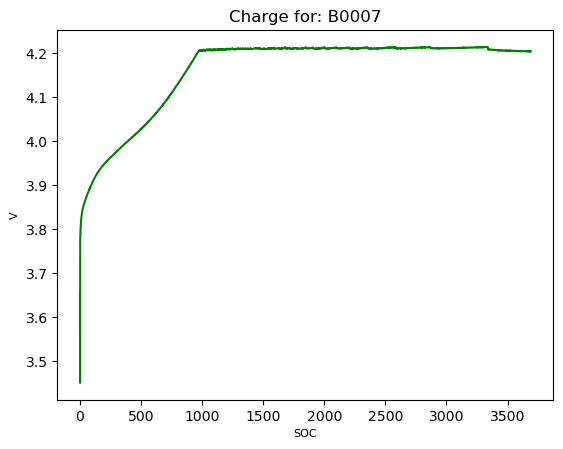

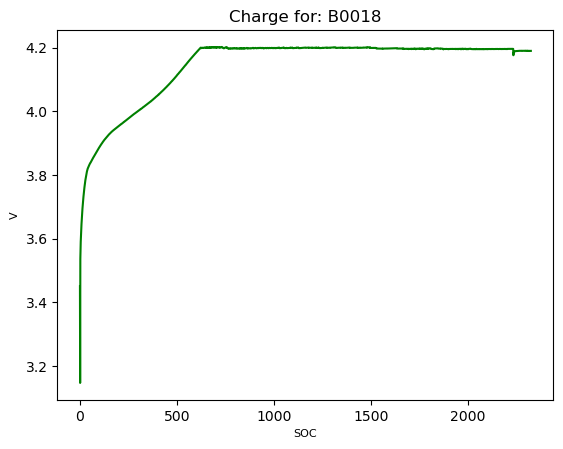

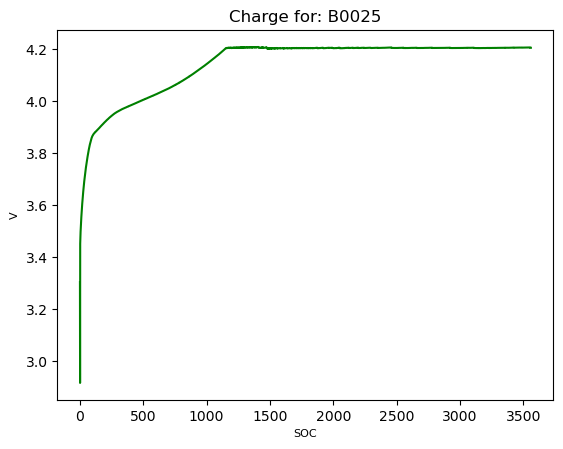

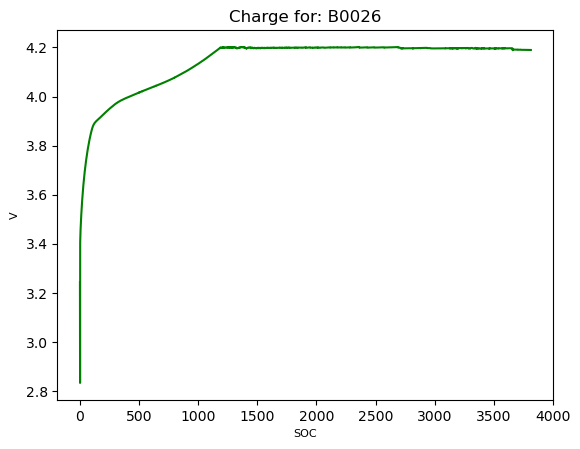

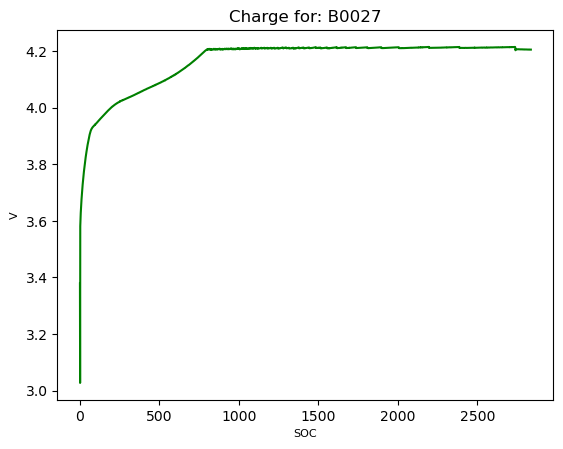

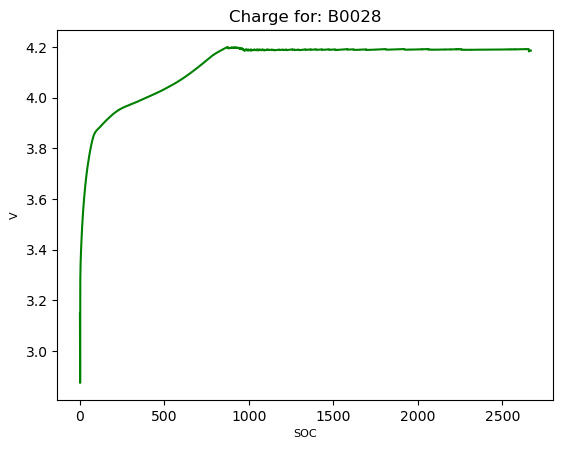

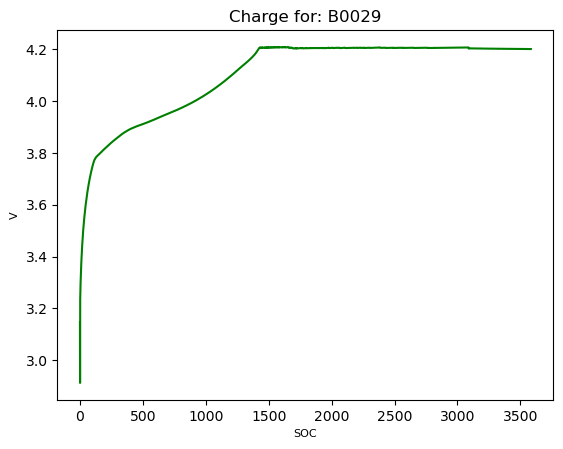

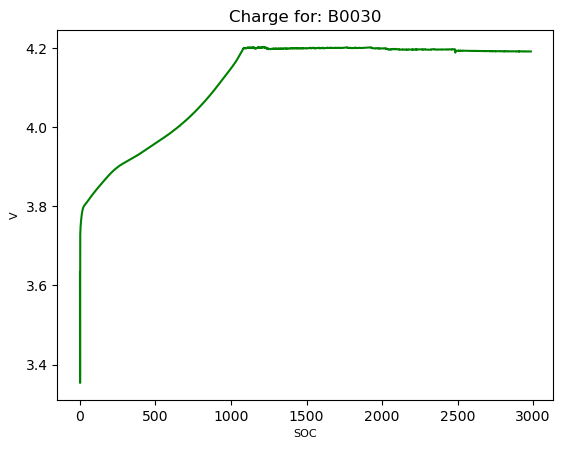

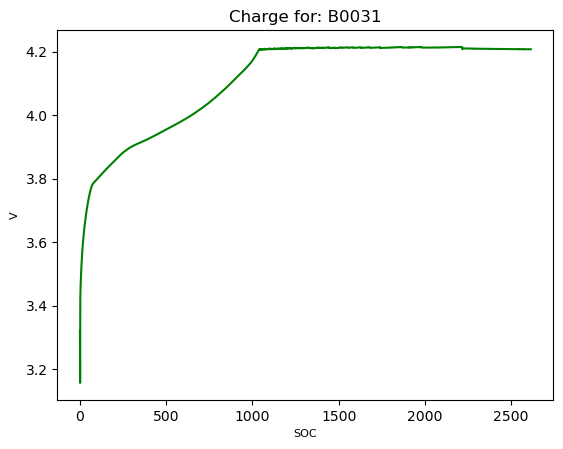

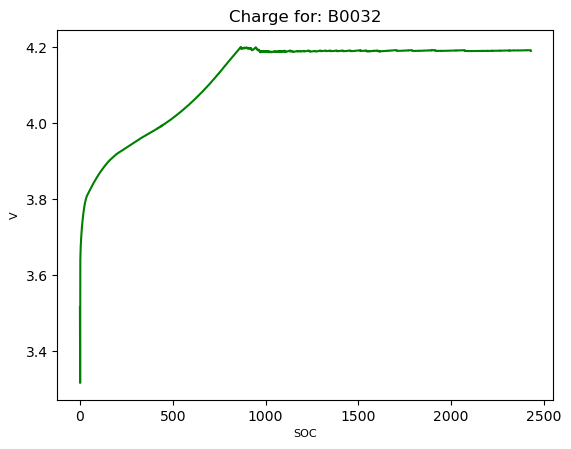

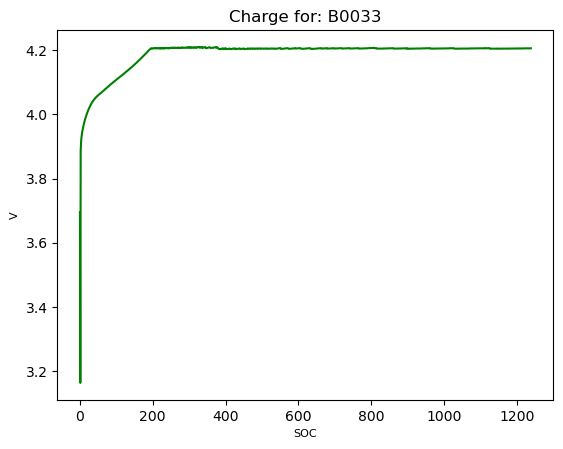

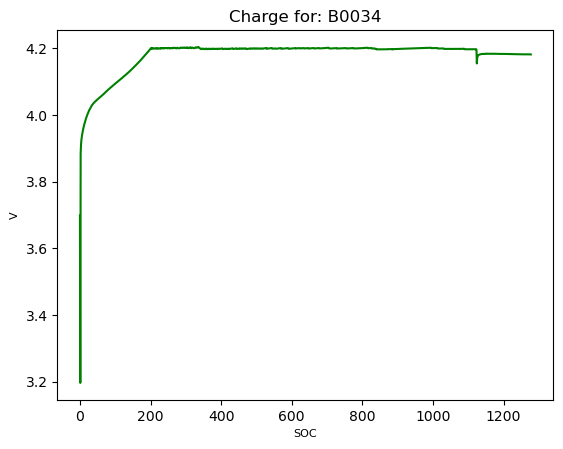

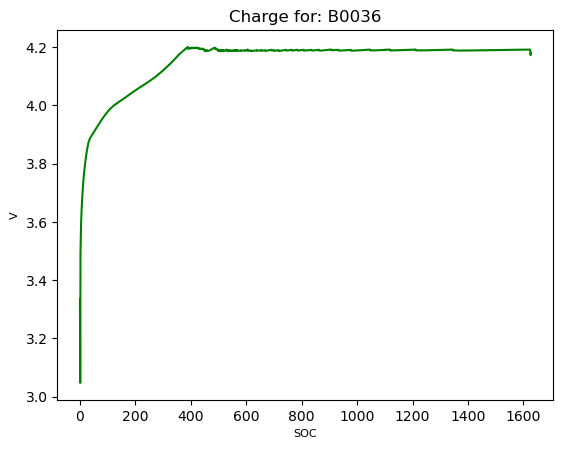

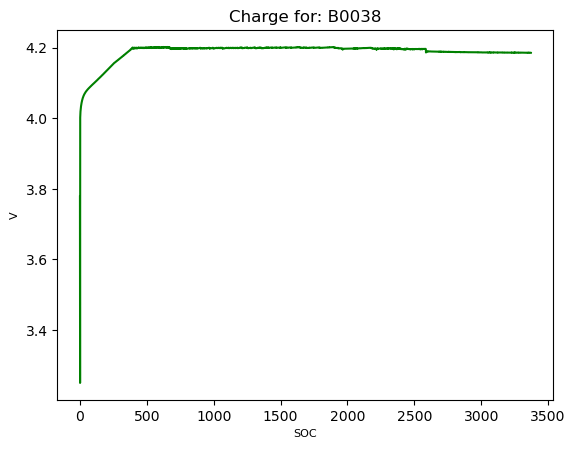

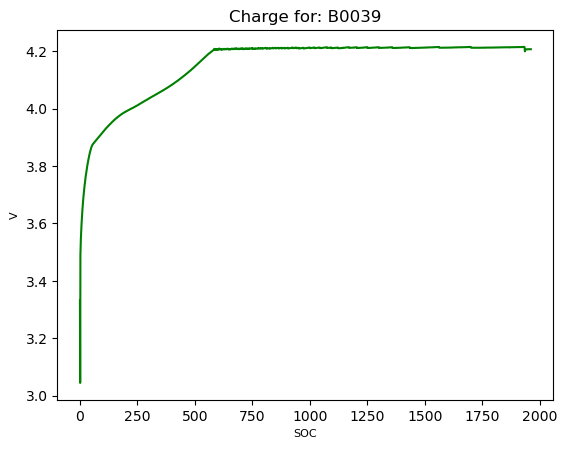

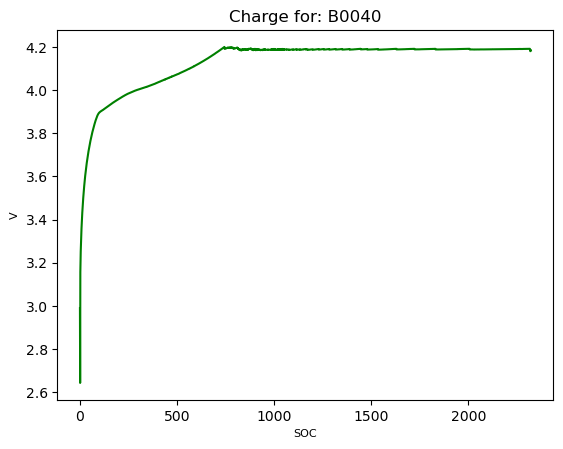

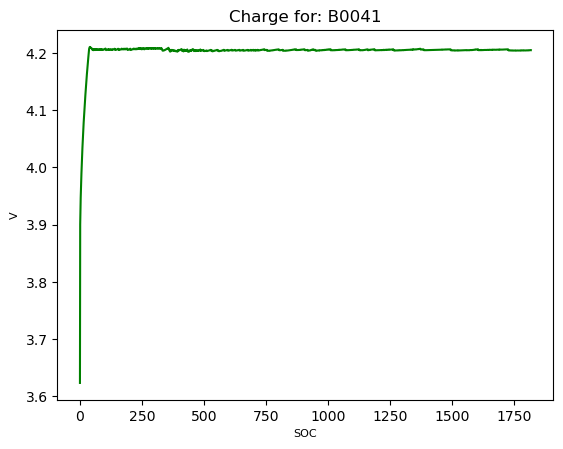

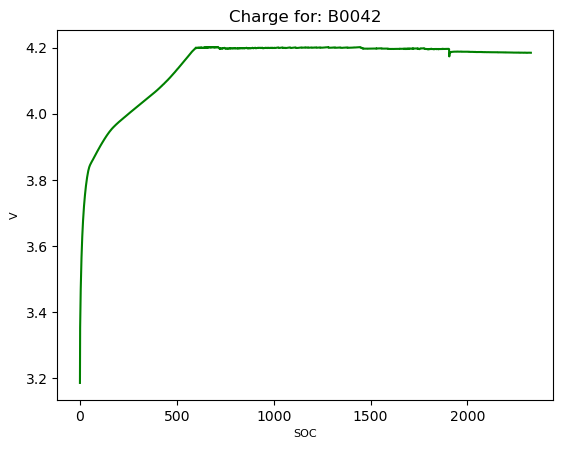

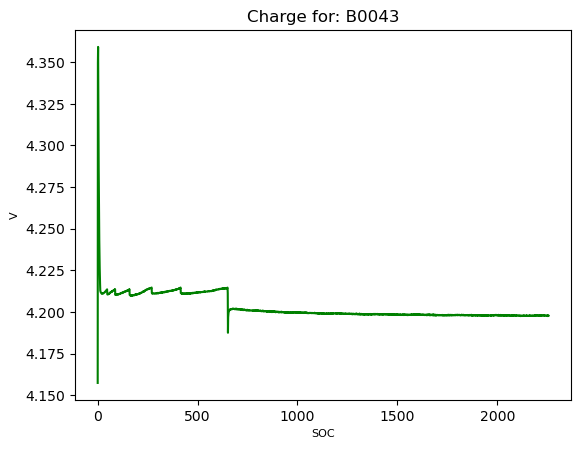

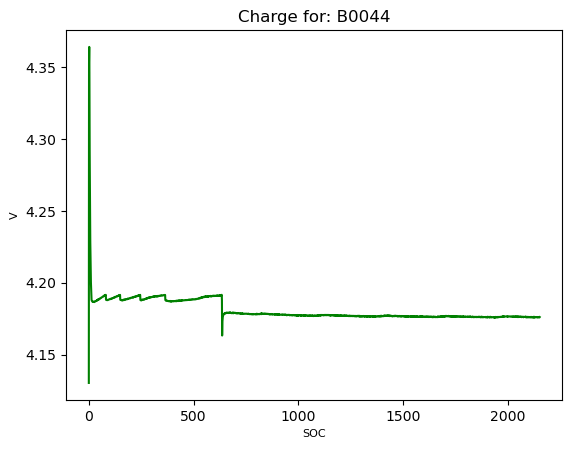

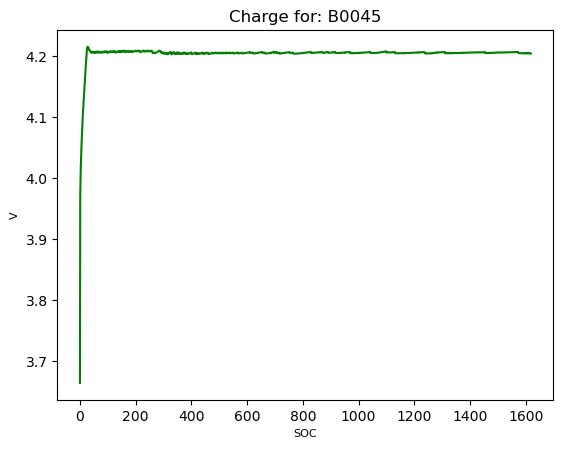

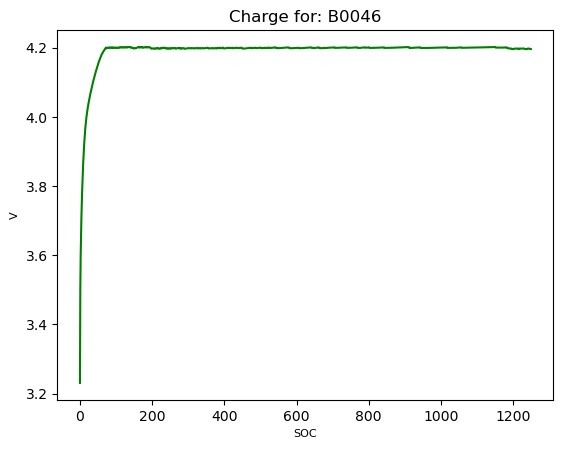

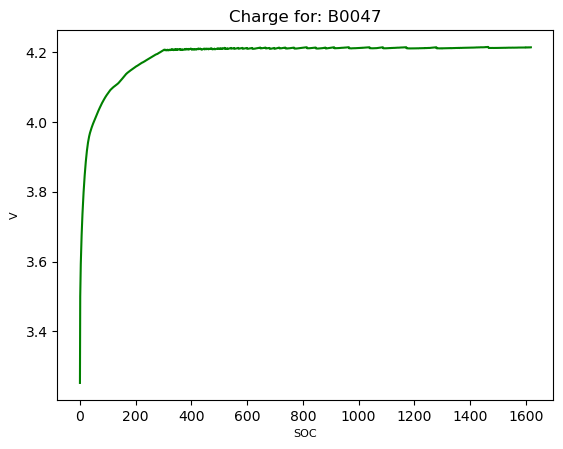

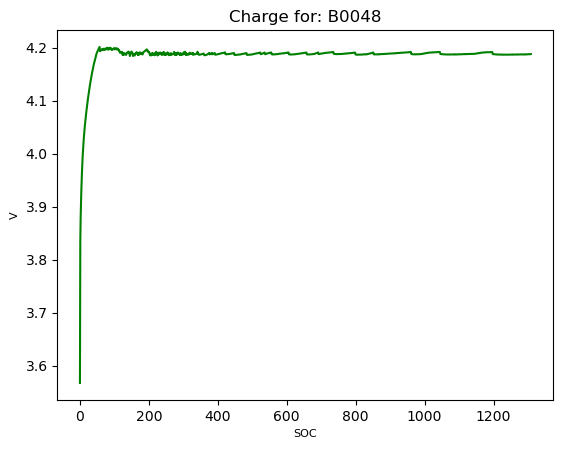

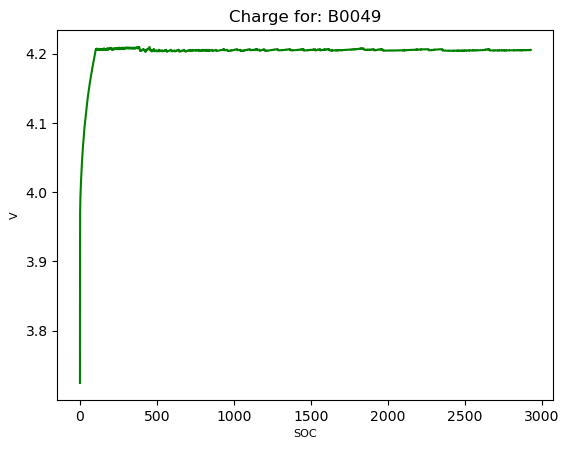

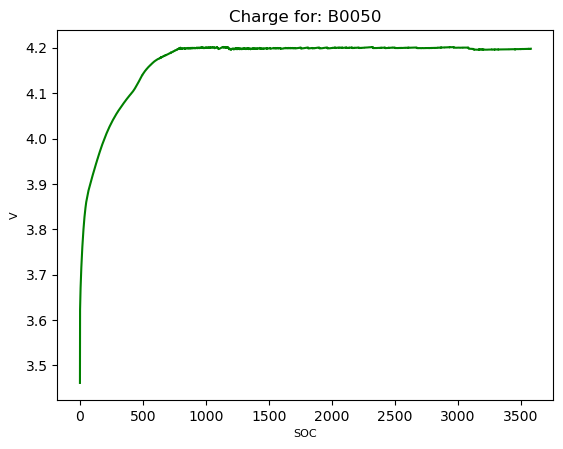

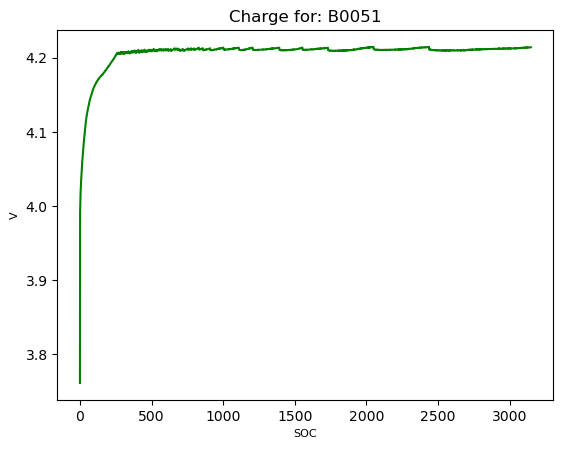

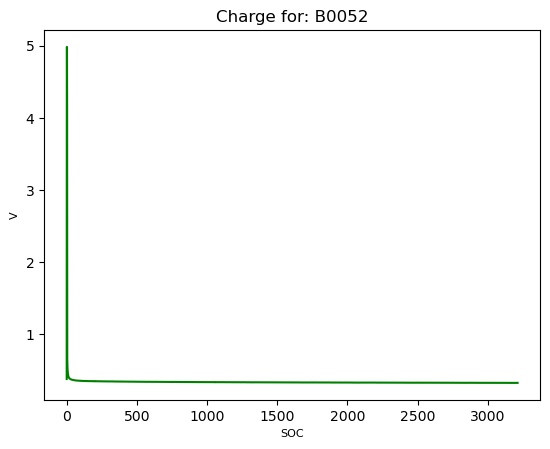

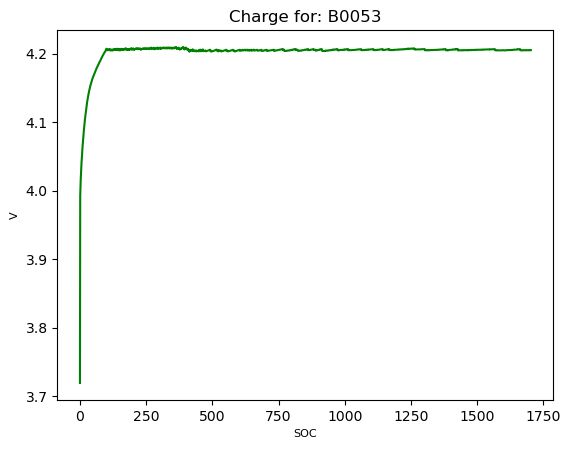

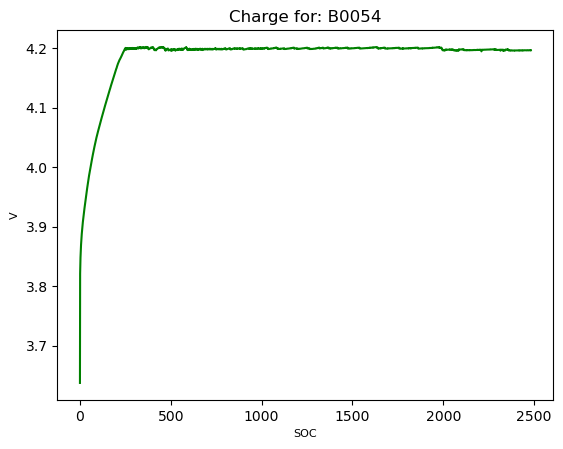

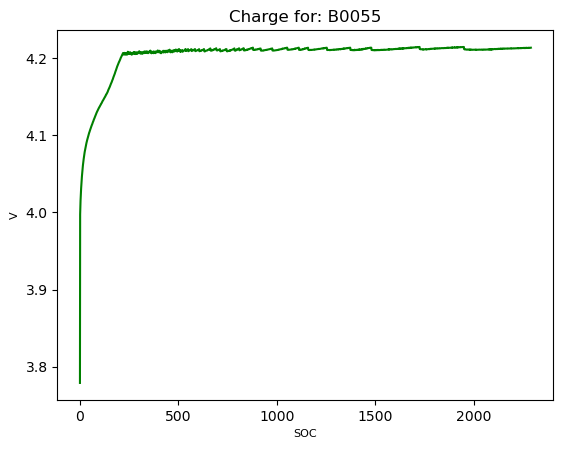

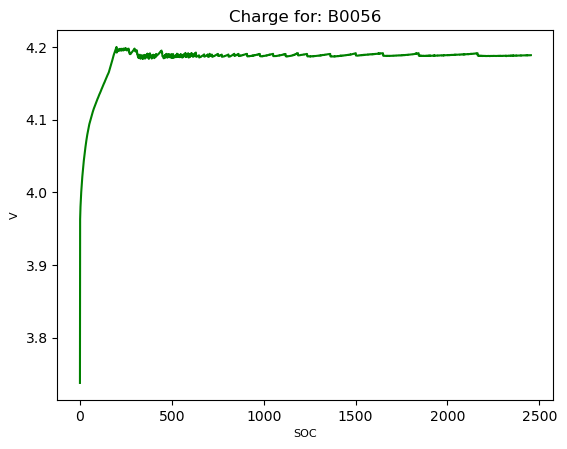

In [75]:
for bat_id, data in ch_bat_data.items():
   # ax = plt.axes(projection = '3d')
    x= data['Voltage'][0]
    y=[]
    for i in range(len(x)):
        y.append(i)
    #z = []
    #for i in range(48):
     #   z.append(i)
    plt.xlabel('SOC', fontsize = 8)
    plt.ylabel('V', fontsize = 8)
    plt.title(f'Charge for: {bat_id}')
    plt.plot(y, x, color = 'green')
    plt.show()
    #ax.scatter(x, y, z)

In [20]:
##############################################################

In [140]:
dch_bat_data = {}
for index, row in dch_files_df.iterrows():
    bat_id = row['battery_id']
    file = row['filename']
    start_time = row['start_time']
    file_path = f"data/{file}"
    data = pd.read_csv(file_path)
    voltage = data['Voltage_measured'].tolist()
    cur_load = data['Current_load'].tolist()
    vol_load = data['Voltage_load'].tolist()
    soc = []
    for i in range(len(voltage)):
        t = (voltage[i]/4.26) * 100
        soc.append(t)
    
    dch_bat_data[bat_id] = {'start_time' : [], 'Voltage': [], 'Current_load' : [], 'Voltage_load': [], 'SOC %': []}
    for i in range(len(voltage)):
        if cur_load[i]>=0.8:
            dch_bat_data[bat_id]['start_time'].append(start_time)
            dch_bat_data[bat_id]['Voltage'].append(voltage[i])
            dch_bat_data[bat_id]['Current_load'].append(cur_load[i])
            dch_bat_data[bat_id]['Voltage_load'].append(vol_load[i])
            dch_bat_data[bat_id]['SOC %'].append(soc[i])
        else:
            continue

In [156]:
for bat_id, data in dch_bat_data.items():
   # ax = plt.axes(projection = '3d')
    x= data['Voltage']
    y= data['SOC %']

ValueError: min() iterable argument is empty

In [146]:
for bat_id, data in dch_bat_data.items():
   # ax = plt.axes(projection = '3d')
    x= data['Voltage']
    y= data['SOC %']
    q = max(x)
    p= 
    
    #z = []
    #for i in range(48):
     #   z.append(i)
    plt.xlabel('SOC', fontsize = 8)
    plt.ylabel('V', fontsize = 8)
    plt.title(f'Discharge for: {bat_id}')
    plt.plot(y, x, color = 'blue', marker = 'v')
    plt.xlim(0, 100)
    plt.ylim(p-0.1, q+0.1)
    #ax.scatter(x, y, z)
    plt.show()

ValueError: max() iterable argument is empty

In [ ]:
############################################################

In [87]:
data = pd.read_csv('data.csv')

# Function to compute dQ/dV
def compute_dqdv(cycle_data):
    voltage = cycle_data['Voltage']
    capacity = cycle_data['Capacity']
    dV = np.diff(voltage)
    dQ = np.diff(capacity)
    dQdV = dQ / dV
    return voltage[:-1], dQdV

# Plot dQ/dV vs. Voltage for a single cycle
cycle_number = 1
cycle_data = data[data['Cycle'] == cycle_number]
voltage, dQdV = compute_dqdv(cycle_data)

plt.figure(figsize=(8, 5))
plt.plot(voltage, dQdV, label=f'Cycle {cycle_number}')
plt.title('Incremental Capacity Analysis (dQ/dV vs. V)')
plt.xlabel('Voltage (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.legend()
plt.grid()
plt.show()

# Create a 3D plot for dQ/dV vs. Voltage and Cycle Count
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

cycle_numbers = data['Cycle'].unique()
for cycle in cycle_numbers:
    cycle_data = data[data['Cycle'] == cycle]
    voltage, dQdV = compute_dqdv(cycle_data)
    ax.plot(voltage, [cycle] * len(voltage), dQdV, label=f'Cycle {cycle}')

ax.set_title('dQ/dV Peaks Evolution with Aging (Cycle Count)')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Cycle Count')
ax.set_zlabel('dQ/dV (Ah/V)')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [297]:
cap = pd.read_csv("metadata.csv")[['type', 'start_time', 'battery_id', 'filename', 'Capacity', 'Re', 'Rct']]
cap1 = cap.loc[cap['type'] != 'charge']
cap1['start_time'] = cap1['start_time'].apply(convert_time)
cap1 = cap1.dropna(subset='start_time')
cap1 = cap1.sort_values(by= 'battery_id')
cap1.head(20)

C:\Users\Jeroen\AppData\Local\Temp\ipykernel_9920\2606981247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['start_time'] = cap1['start_time'].apply(convert_time)


type          start_time battery_id   filename            Capacity  \
5259  discharge 2008-04-26 01:04:35      B0005  05260.csv  1.7517304870664143   
5541  impedance 2008-05-15 14:38:58      B0005  05542.csv                 NaN   
5539  impedance 2008-05-15 11:10:28      B0005  05540.csv                 NaN   
5538  discharge 2008-05-15 10:20:03      B0005  05539.csv   1.412409228794446   
5537  impedance 2008-05-15 09:48:03      B0005  05538.csv                 NaN   
5535  impedance 2008-05-15 06:14:38      B0005  05536.csv                 NaN   
5534  discharge 2008-05-15 05:24:04      B0005  05535.csv   1.417429032731308   
5533  impedance 2008-05-15 04:52:04      B0005  05534.csv                 NaN   
5531  impedance 2008-05-15 01:18:37      B0005  05532.csv                 NaN   
5530  discharge 2008-05-15 00:27:55      B0005  05531.csv  1.4229203181741186   
5529  impedance 2008-05-14 23:55:55      B0005  05530.csv                 NaN   
5527  impedance 2008-05-14 20:22:30      B0005  05528.csv                 NaN   
5526  discharge 2008-05-14 19:31:39      B0005  05527.csv    1.42806487344776   
5525  impedance 2008-05-14 18:59:38      B0005  05526.csv                 NaN   
5523  impedance 2008-05-14 15:26:13      B0005  05524.csv                 NaN   
5522  discharge 2008-05-14 14:35:22      B0005  05523.csv  1.4333958900838095   
5521  impedance 2008-05-14 14:03:22      B0005  05522.csv                 NaN   
5519  impedance 2008-05-14 10:43:12      B0005  05520.csv                 NaN   
5518  discharge 2008-05-14 09:52:22      B0005  05519.csv   1.433445432156979   
5517  impedance 2008-05-14 09:20:22      B0005  05518.csv                 NaN   

                        Re                  Rct  
5259                   NaN                  NaN  
5541   0.06260506440345279  0.08502111899525971  
5539   0.06134389439332634  0.07989290542746168  
5538                   NaN                  NaN  
5537  0.058400743519397356  0.08632938236969102  
5535   0.05920398197966059  0.08007181105183933  
5534                   NaN                  NaN  
5533   0.05959588691816853  0.08518775171680287  
5531   0.05979534226516758  0.07964682734703848  
5530                   NaN                  NaN  
5529   0.05993762786815949  0.08479950183605617  
5527   0.05834271794334396  0.07994246159333938  
5526                   NaN                  NaN  
5525   0.06083767084489383  0.08490902777488013  
5523   0.06134060755888107  0.07733665024296885  
5522                   NaN                  NaN  
5521   0.05874548029308314  0.08711721350349075  
5519    0.0584896827626018  0.07964370546866237  
5518                   NaN                  NaN  
5517  0.059853349010250065  0.08473917663733575

In [411]:
condition_1 = cap1['Re'].notna() & cap1['Rct'].notna() & cap1['Capacity'].shift(-1).notna()
con_1 = condition_1.tolist()
cap1['Cond'] = con_1
cap1['Cond'] = cap1['Cond'] | cap1['Cond'].shift(1, fill_value=False)
cap1.head(20)
cap2 = cap1.loc[cap1['Cond']==True]
cap2.head(20)

type          start_time battery_id   filename            Capacity  \
5539  impedance 2008-05-15 11:10:28      B0005  05540.csv                 NaN   
5538  discharge 2008-05-15 10:20:03      B0005  05539.csv   1.412409228794446   
5535  impedance 2008-05-15 06:14:38      B0005  05536.csv                 NaN   
5534  discharge 2008-05-15 05:24:04      B0005  05535.csv   1.417429032731308   
5531  impedance 2008-05-15 01:18:37      B0005  05532.csv                 NaN   
5530  discharge 2008-05-15 00:27:55      B0005  05531.csv  1.4229203181741186   
5527  impedance 2008-05-14 20:22:30      B0005  05528.csv                 NaN   
5526  discharge 2008-05-14 19:31:39      B0005  05527.csv    1.42806487344776   
5523  impedance 2008-05-14 15:26:13      B0005  05524.csv                 NaN   
5522  discharge 2008-05-14 14:35:22      B0005  05523.csv  1.4333958900838095   
5519  impedance 2008-05-14 10:43:12      B0005  05520.csv                 NaN   
5518  discharge 2008-05-14 09:52:22      B0005  05519.csv   1.433445432156979   
5515  impedance 2008-05-14 05:46:58      B0005  05516.csv                 NaN   
5514  discharge 2008-05-14 04:55:57      B0005  05515.csv  1.4386709371480566   
5511  impedance 2008-05-14 00:50:35      B0005  05512.csv                 NaN   
5542  discharge 2008-05-15 15:10:59      B0005  05543.csv   1.412578792940193   
5545  impedance 2008-05-15 19:24:46      B0005  05546.csv                 NaN   
5546  discharge 2008-05-15 19:56:47      B0005  05547.csv  1.4075983731469897   
5577  impedance 2008-05-18 03:55:17      B0005  05578.csv                 NaN   
5576  discharge 2008-05-18 03:05:19      B0005  05577.csv  1.3862287677978349   

                        Re                  Rct  Cond  
5539   0.06134389439332634  0.07989290542746168  True  
5538                   NaN                  NaN  True  
5535   0.05920398197966059  0.08007181105183933  True  
5534                   NaN                  NaN  True  
5531   0.05979534226516758  0.07964682734703848  True  
5530                   NaN                  NaN  True  
5527   0.05834271794334396  0.07994246159333938  True  
5526                   NaN                  NaN  True  
5523   0.06134060755888107  0.07733665024296885  True  
5522                   NaN                  NaN  True  
5519    0.0584896827626018  0.07964370546866237  True  
5518                   NaN                  NaN  True  
5515  0.058938187317504366  0.07953792065559018  True  
5514                   NaN                  NaN  True  
5511   0.05835227769750316  0.07964710418735362  True  
5542                   NaN                  NaN  True  
5545   0.06115195391732467  0.08485577620272611  True  
5546                   NaN                  NaN  True  
5577   0.06148387399714281  0.08269579716686087  True  
5576                   NaN                  NaN  True

In [321]:
cap2.head()

type          start_time battery_id   filename           Capacity  \
5539  impedance 2008-05-15 11:10:28      B0005  05540.csv                NaN   
5538  discharge 2008-05-15 10:20:03      B0005  05539.csv  1.412409228794446   
5535  impedance 2008-05-15 06:14:38      B0005  05536.csv                NaN   
5534  discharge 2008-05-15 05:24:04      B0005  05535.csv  1.417429032731308   
5531  impedance 2008-05-15 01:18:37      B0005  05532.csv                NaN   

                       Re                  Rct  Cond  
5539  0.06134389439332634  0.07989290542746168  True  
5538                  NaN                  NaN  True  
5535  0.05920398197966059  0.08007181105183933  True  
5534                  NaN                  NaN  True  
5531  0.05979534226516758  0.07964682734703848  True

In [580]:
dfn = cap2[['battery_id', 'Capacity']].dropna()
bat_id = dfn['battery_id']
bat_id = bat_id.tolist()
Re = cap2['Re']
Re = Re.dropna().tolist()
Rct = cap2['Rct']
Rct = Rct.dropna().tolist()
Cap = cap2['Capacity']
Cap = Cap.dropna().tolist()
R = {
    'Bat_ID' : bat_id,
    'Re' : Re,
    'Rct' : Rct,
    'Capacity' :Cap
}

len(R['Bat_ID'])

cap_df = pd.DataFrame(R)
cap_df.head(200)

Bat_ID                   Re                  Rct            Capacity
0    B0005  0.06134389439332634  0.07989290542746168   1.412409228794446
1    B0005  0.05920398197966059  0.08007181105183933   1.417429032731308
2    B0005  0.05979534226516758  0.07964682734703848  1.4229203181741186
3    B0005  0.05834271794334396  0.07994246159333938    1.42806487344776
4    B0005  0.06134060755888107  0.07733665024296885  1.4333958900838095
..     ...                  ...                  ...                 ...
195  B0006  0.07634314633390711  0.10459379391771405  1.2271137666213534
196  B0006  0.07548574752727838  0.10415670198896312  1.2217397581377356
197  B0006    0.075678173941146  0.10498941605859084  1.2479761706842853
198  B0006  0.06586299475840429  0.08404816384807184  1.9459811331421641
199  B0006  0.07275773932145782  0.09742370041141407   1.441380399427779

[200 rows x 4 columns]

In [630]:
def capacity_pred(bat_id):    
    try:
        re = cap_df['Re'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        rct = cap_df['Rct'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        cap = cap_df['Capacity'].loc[cap_df['Bat_ID'] == bat_id].tolist()
        Re, Rct, Cap = [], [], []
        for i in range(len(re)):
            Re.append(float(re[i]))
            Rct.append(float(rct[i]))
            Cap.append(float(cap[i]))
        R = []
        for i in range(len(Re)):
            R.append([Re[i],Rct[i]])

        x= np.array(R)
        y= np.array(Cap)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
        from sklearn.linear_model import LinearRegression
        lr_clf = LinearRegression()

        lr_clf.fit(x_train, y_train)
        pred = lr_clf.predict(x_test)
        print("The score of model is:")
        print(lr_clf.score(x_test, y_test))
        for i in range(len(y)):
            print(f"The Capacity prediction for values {i} is:" , pred[i])
            print(f"The actual Capacity value for values {i}:", y_test[i])
            print("")
    except ValueError as e:
        print(f"Battery {bat_id} doesnt exist. Error: {e}")
    
capacity_pred('B0007')

The score of model is:
0.8411261923210962
The Capacity prediction for values 0 is: 1.5913363378184608
The actual Capacity value for values 0: 1.5799737147242376

The Capacity prediction for values 1 is: 1.6893427557243457
The actual Capacity value for values 1: 1.723900324588418

The Capacity prediction for values 2 is: 1.5546565211633099
The actual Capacity value for values 2: 1.4827874322228984

The Capacity prediction for values 3 is: 1.7828159658726834
The actual Capacity value for values 3: 1.8116056333939583

The Capacity prediction for values 4 is: 1.6964922600845822
The actual Capacity value for values 4: 1.7285642277717963

The Capacity prediction for values 5 is: 1.686573884406195
The actual Capacity value for values 5: 1.641119179218384

The Capacity prediction for values 6 is: 1.6540124876878977
The actual Capacity value for values 6: 1.6888211161855506

The Capacity prediction for values 7 is: 1.6939149674712104
The actual Capacity value for values 7: 1.7040137474382486

T

IndexError: index 28 is out of bounds for axis 0 with size 28